## Below are the steps executed in this notebook
<b> 1. IMPORT LIBRARIES </b> <br>
<b> 2. LOAD DATASET </b> <br>
<b> 3. SPLITTING DATASET </b> <br>
<b> 4. MODEL & EVALUATION </b><br>
- 1. KNN
- 2. Random Forest Classifier
- 3. Gradient Boosting Classifier

<b> 5. Lets try to improve performance of KNN using Standard Scaler</b> <br>
<b> 6. CHECK FEATURE IMPORTANCE </b> <br>
<b> 7. CONCLUSION & BUSINESS RECOMMENDATION </b>

## 1. IMPORT LIBRARIES

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 2. LOAD DATASET

In [30]:
df = pd.read_csv('airline_passenger_satisfaction_model_build.csv')

## 3. SPLITTING DATASET

In [31]:
X = df.drop(['ID','Satisfaction'], axis=1) #Remove ID because we will not use the feature
y = df['Satisfaction']

In [32]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)

Shape of training set  (103589, 27)
Shape of test set  (25898, 27)


## 4. MODEL & EVALUATION

### 1. KNN

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

## print classification report
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70     11153
           1       0.77      0.81      0.79     14745

    accuracy                           0.75     25898
   macro avg       0.75      0.74      0.75     25898
weighted avg       0.75      0.75      0.75     25898



### 2. Random Forest Classifier

In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

## print classification report
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     11153
           1       0.96      0.98      0.97     14745

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



### 3. Gradient Boosting Classifier

In [1]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

## print classification report
print(classification_report(y_test, y_pred, labels=[0, 1]))

NameError: name 'GradientBoostingClassifier' is not defined

**Objectives:**

Random Forest and Gradient Boosting performs better than KNN  in predicting the target variable and identifying the instances for this dataset

## 5. Lets try to improve performance of KNN using Standard Scaler

In [36]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
knn_scaled_model = KNeighborsClassifier(n_neighbors=5)
knn_scaled_model.fit(X_train_scaled, y_train)
y_pred = knn_scaled_model.predict(X_test_scaled)

## print classification report
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     11153
           1       0.91      0.96      0.94     14745

    accuracy                           0.93     25898
   macro avg       0.93      0.92      0.93     25898
weighted avg       0.93      0.93      0.93     25898



**Objectives:**

1. After adding standard scaler to KNN, the model performs really well in predicting the target variable and identifying the instances for this dataset

2. In terms of precision, recall, and F1-score, all models have higher performance metrics for class 1 (neutral or dissatisfied) than for class 0 (satisfied). This is expected since class 1 has more samples and the models are biased towards predicting the majority class.

Overall, Random Forest has the best performance for both classes based on the weighted average F1-score, with a value of 0.96.
 
KNN and Gradient Boosting have slightly lower weighted average F1-scores of 0.93 and 0.94, respectively.


## 6. CHECK FEATURE IMPORTANCE

<AxesSubplot:xlabel='importance', ylabel='index'>

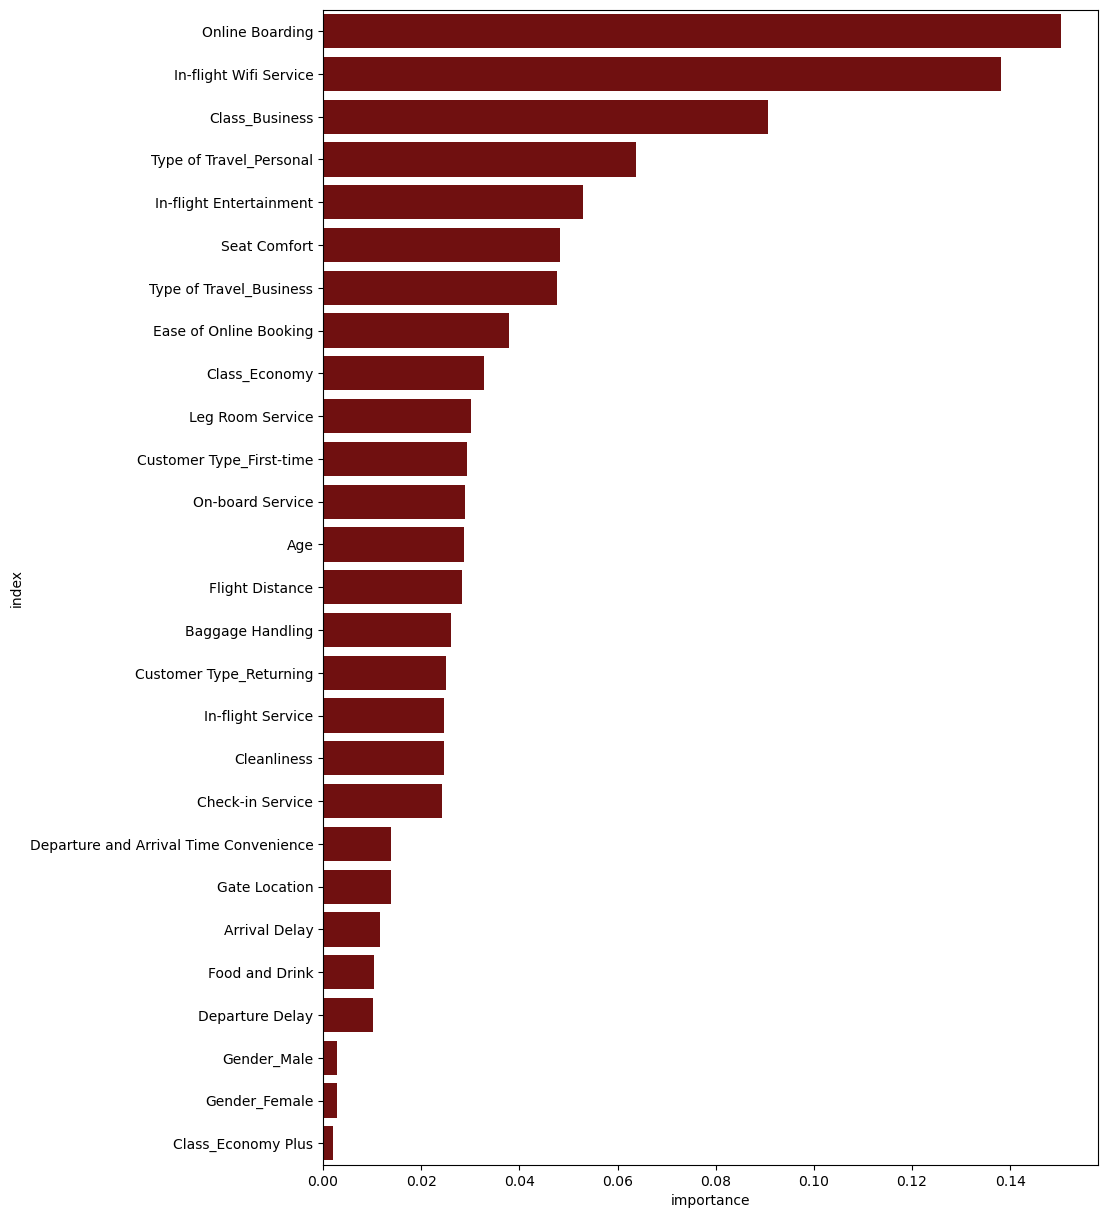

In [38]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(10,15))
sns.barplot(x='importance', y='index', color='#800000',data=feature_importances.reset_index())


**Objectives:**

Online boarding and In-Flight Wifi Service are the most influential features that contribute the most to the prediction accuracy.

## 7. CONCLUSION & BUSINESS RECOMMENDATION

**Conclusion**

The airline passengers satisfaction dataset is consist of 129,880 rows and 23 columns. The dataset is slightly imbalanced and has outliers in some features. To transform the non-numerical columns into numerical, I did one-hot encoding for the features and label encoding for the target variable. After encoding process, the dataset has 28 features. I split the dataset into 80% training data and 20% test data. I choose KNN, Random Forest, and Gradient boosting as the model to predict the airline passengers satisfaction since the dataset is a high-dimensional data, has outliers, and the target variable is binary *(1: neutral or dissatisfied, 0: satisfied)*. 

Before doing the data normalization, KNN performance is not really good comparing to the other models. Then I add standard scaler to improve KNN performance with the end result Random Forest has the best performance for both classes based on the weighted average F1-score, with a value of 0.96, KNN and Gradient Boosting have slightly lower weighted average F1-scores of 0.93 and 0.94, respectively. 

From this research we can conclude that tree based models performance is better than non tree based models. The tree based models performs really well without any normalization. It proves that tree based model is robust with outlier. Meanwhile KNN needs data normalization to handle the outliers before achieving the best evaluation score. It is because the behaviour of KNN is sensitive with outlier and the scale of the input features. For this three models, the slightly imbalanced dataset is not affecting too much to their performance.

**Business Recomendation**

Most of the passengers are adults age 20-60. The most satisfied passengers are passengers in their 40s. Although the `neutral or dissatisfied` passengers is more than the `satisfied` passengers, The gap between both satisfaction in all age categories are not too big so the airline company can improve the service to retain existing passengers and reduce the number of `neutral or dissatisfied` passenger. 

The majority of the passengers type is returning passengers with business needs and most of them choose business class. People tend to choose this airline for medium to long haul flight.

from this insight company can focus on :

1. maintaining high standards of service in business class: Since most of the returning passengers choose business class, the airline company should focus on maintaining high standards of service in this class. This includes providing comfortable seats, high-quality food and drinks, and excellent customer service.

2. Offer loyalty programs and incentives for frequent business travelers: To retain their loyal customers, the airline company could offer loyalty programs and incentives such as discounts on future flights, complimentary upgrades, or exclusive access to airport lounges.

3. Enhance the in-flight entertainment options: Since many business travelers use their flight time for work or productivity, the airline company could consider enhancing the in-flight entertainment options to include more business-oriented content such as access to online productivity tools, business news, and webinars.

4. Improve the booking and check-in process: To make the travel experience more seamless and efficient for business travelers, the airline company could consider improving the booking and check-in process. This could include offering online check-in, mobile boarding passes, and expedited security lines for business class passengers.

5. Expand routes and frequencies to key business destinations: To attract more business travelers, the airline company could consider expanding its routes and frequencies to key business destinations. This could help the airline company capture a larger share of the corporate travel market and increase its revenue.
